# Manipulation de séries financières avec la classe StockPrices

La classe [StockPrices](http://www.xavierdupre.fr/app/pyensae/helpsphinx/notebooks/pyensae%20StockPrices.html?highlight=stockprices) facilite la récupération de données financières via différents sites. Le site [Yahoo Finance](http://finance.yahoo.com/) requiet maintenant un cookie (depuis Mai 2017) et il est préférable de choisir [Google](https://www.google.com/finance?q=apple&ei=bPghWZnLDoKVULfBk-gC) ou [Quandl](https://www.quandl.com/tools/python). Google ne fonctionne que les marchés américains, [Quandl](https://www.quandl.com/tools/python) a des historiques plus courts.

In [1]:
import pyensae
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Initialisation

In [3]:
import pyensae
import os
from pyensae.finance import StockPrices
cache = os.path.abspath("cache")
if not os.path.exists(cache):
    os.mkdir(cache)

### Créer un objet StockPrices

Le plus est d'utiliser le tick de la série financière utilisé par le site [Yahoo Finance](https://fr.finance.yahoo.com) ou [Google Finance](https://www.google.com/search?q=finance) qui fait maintenant partie du moteur de recherche ou [quandl](https://www.quandl.com/tools/python).

In [4]:
source = 'yahoo_new'
tick = 'MSFT'
stock = StockPrices(tick, folder=cache, url=source)
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-01-03,2000-01-03,58.68750,59.3125,56.00000,58.28125,42.295185,53228400
2000-01-04,2000-01-04,56.78125,58.5625,56.12500,56.31250,40.866425,54119000
2000-01-05,2000-01-05,55.56250,58.1875,54.68750,56.90625,41.297348,64059600
2000-01-06,2000-01-06,56.09375,56.9375,54.18750,55.00000,39.913952,54976600
2000-01-07,2000-01-07,54.31250,56.1250,53.65625,55.71875,40.435547,62013600


In [5]:
stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2019-01-25,2019-01-25,107.239998,107.879997,106.199997,107.169998,107.169998,31225600
2019-01-28,2019-01-28,106.260002,106.480003,104.660004,105.080002,105.080002,29476700
2019-01-29,2019-01-29,104.879997,104.970001,102.169998,102.940002,102.940002,31490500
2019-01-30,2019-01-30,104.620003,106.379997,104.330002,106.379997,106.379997,49471900
2019-01-31,2019-01-31,103.800003,105.220001,103.180000,104.430000,104.430000,55636400


La classe <tt>StockPrices</tt> contient un objet <a href="http://pandas.pydata.org/pandas-docs/version/0.13.1/generated/pandas.DataFrame.html">pandas.DataFrame</a> auquel on accède en écrivant <tt>stock.dataframe</tt> ou <tt>stock.df</tt> :

In [6]:
stock.dataframe.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

De la même manière, on peut créer un objet <tt>StockPrices</tt> à partir d'un DataFrame :

In [7]:
import pandas
data = [{"Date":"2014-04-01", "Close":105.6}, {"Date":"2014-04-02", "Close":104.6}, 
        {"Date":"2014-04-03", "Close":105.8}, ]
df = pandas.DataFrame(data)
stock = StockPrices("donnees",df)
stock.head()

,Close,Date
Date,,
2014-04-01,105.6,2014-04-01
2014-04-02,104.6,2014-04-02
2014-04-03,105.8,2014-04-03


### Quelques graphes

Premier dessin, on télécharge les données de BNP puis on dessine le cours de l'action.

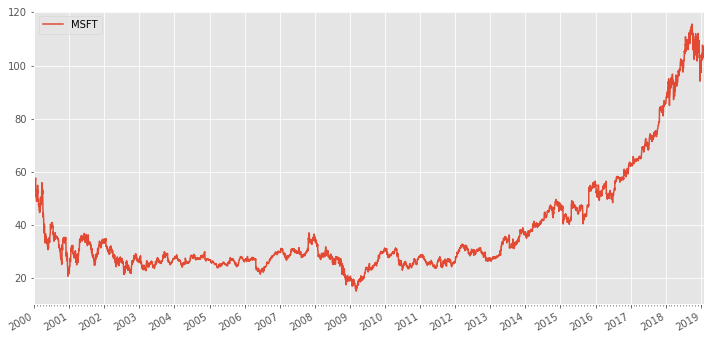

In [8]:
import datetime
stock = StockPrices(tick, folder=cache, url=source)
ax = StockPrices.draw(stock, figsize=(12,6))

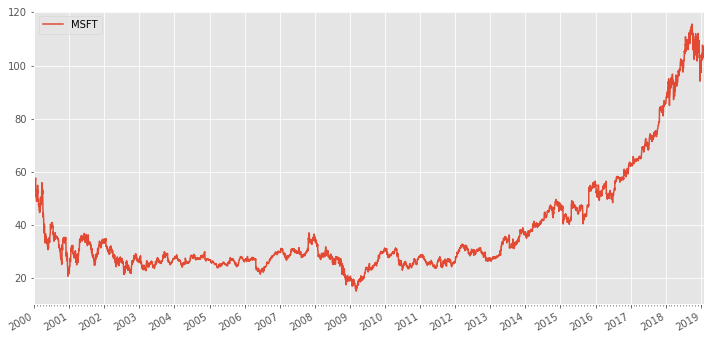

In [9]:
stock = StockPrices(tick, folder=cache, url=source)
StockPrices.draw(stock, figsize=(12,6));

La même chose se produit sur une autre série financière mais pas à la même date. On trace maintenant la série *Open* (*Adj Close* défini
sur cette page [View and download historical price, dividend, or split data](https://help.yahoo.com/kb/finance/historical-prices-sln2311.html?impressions=true) n'est disponible qu'avec Yahoo).

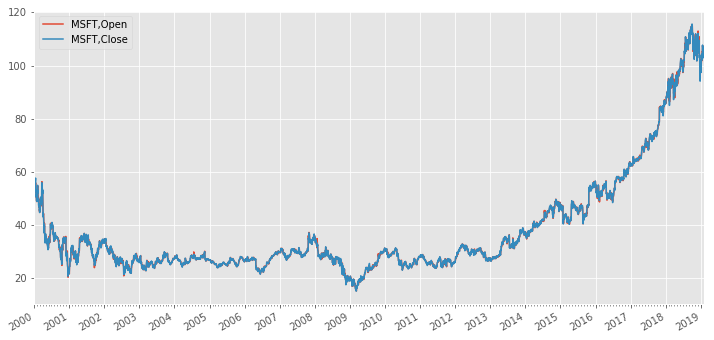

In [10]:
stock = StockPrices("MSFT", folder=cache, url='yahoo')
StockPrices.draw(stock, field=["Open", "Close"], figsize=(12,6));

Ce type de série ne fait pas toujours apparaître les saut de prix qui survient comme par exemple le <a href="http://invest.bnpparibas.com/fr/pid5900/en-bref.html">20 février 2002</a> lorsque le cours nominal de l'action de la BNP a été divisé par deux pour augmenter la liquidité. Le nombre d'actions a été multiplié par deux. Les données sont le plus souvent corrigées [BNP février 2002](http://www.google.com/finance/historical?cid=667923&startdate=Feb+15%2C+2002&enddate=Feb+28%2C+2002&num=30&ei=AP8hWaDXF4WNUNuujYgK).

### Ajouter une seconde série sur un graphe

Dans l'exemple suivant, on trace une série financière puis on ajoute la série des rendements sur un second axe.

In [11]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-01-03,2000-01-03,58.68750,59.3125,56.00000,58.28125,42.295185,53228400
2000-01-04,2000-01-04,56.78125,58.5625,56.12500,56.31250,40.866425,54119000
2000-01-05,2000-01-05,55.56250,58.1875,54.68750,56.90625,41.297348,64059600
2000-01-06,2000-01-06,56.09375,56.9375,54.18750,55.00000,39.913952,54976600
2000-01-07,2000-01-07,54.31250,56.1250,53.65625,55.71875,40.435547,62013600


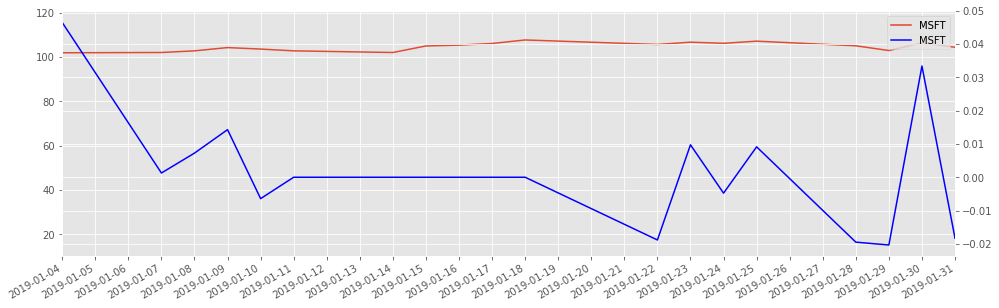

In [12]:
stock = StockPrices(tick)
ret = stock.returns()["2019-01-04":"2019-02-02"]
ret.dataframe.loc["2019-01-11":"2019-01-18","Close"] = 0  # on annule certains valeurs
ax = stock.plot(figsize=(16, 5))
ret.plot(axis=2, ax=ax, label_prefix="r", color='blue');

### Quelques opérations

In [13]:
os.listdir(cache)

['GOOGL.2000-01-03.2018-03-15.txt',
 'GOOGL.2000-01-03.2018-05-13.txt',
 'GOOGL.2000-01-03.2019-02-01.txt',
 'MSFT.2000-01-03.2018-03-15.txt',
 'MSFT.2000-01-03.2018-05-13.txt',
 'MSFT.2000-01-03.2019-02-01.txt']

On affiche les dernières lignes.

In [14]:
stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2019-01-25,2019-01-25,107.239998,107.879997,106.199997,107.169998,107.169998,31225600
2019-01-28,2019-01-28,106.260002,106.480003,104.660004,105.080002,105.080002,29476700
2019-01-29,2019-01-29,104.879997,104.970001,102.169998,102.940002,102.940002,31490500
2019-01-30,2019-01-30,104.620003,106.379997,104.330002,106.379997,106.379997,49471900
2019-01-31,2019-01-31,103.800003,105.220001,103.180000,104.430000,104.430000,55636400


On récupère la série des rendements.

In [15]:
ret = stock.returns()
ret.tail()

,Date,Volume,Open,High,Low,Close,Adj Close
Date,,,,,,,
2019-01-25,2019-01-25,31225600,0.003556,0.008224,0.008164,0.009134,0.009134
2019-01-28,2019-01-28,29476700,-0.009138,-0.012977,-0.014501,-0.019502,-0.019502
2019-01-29,2019-01-29,31490500,-0.012987,-0.014181,-0.023791,-0.020365,-0.020365
2019-01-30,2019-01-30,49471900,-0.002479,0.013432,0.021141,0.033417,0.033417
2019-01-31,2019-01-31,55636400,-0.007838,-0.010904,-0.011023,-0.018330,-0.018330


On trace la série des rendements pour les derniers mois.

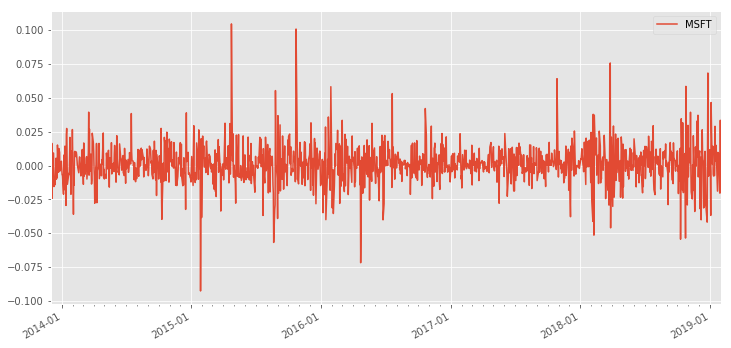

In [16]:
StockPrices.draw(ret, figsize=(12,6), begin="2013-12-01", date_format="%Y-%m");

### Quelques notions sur les dates

La classe <i>StockPrices</i> utilise les dates sous forme de chaînes de caractères. De cette façon, il n'est pas possible de faire des opérations dessus. Pour ce faire, il faut les convertir en un objet appelé <a href="https://docs.python.org/2/library/datetime.html">datetime</a>.

In [17]:
from datetime import datetime, timedelta
dt = datetime.strptime("2014-03-31","%Y-%m-%d")
dt

datetime.datetime(2014, 3, 31, 0, 0)

On ajoute un jour :

In [18]:
delta = timedelta(1)
dt = dt + delta
dt

datetime.datetime(2014, 4, 1, 0, 0)

Puis on convertit dans l'autre sens :

In [19]:
s = dt.strftime("%Y-%m-%d")
s

'2014-04-01'

### Promenade dans l'index

Il est facile de récupérer les valeurs correspondant à une date précise. Mais comment récupérer la valeur du jour d'après ?

In [20]:
tick2 = 'GOOGL'
stock = StockPrices(tick2, folder=cache, url=source)
df = stock.dataframe
print("A", df["2005-01-04":"2005-01-06"])
print("D", df.loc["2005-01-04","Close"])
print("G", df.index.get_loc("2005-01-06"))  # retourne la position de cette date

A                   Date        Open        High        Low      Close  \
Date                                                                   
2005-01-04  2005-01-04  100.800804  101.566566  96.836838  97.347351   
2005-01-05  2005-01-05   96.821823   98.548546  96.211212  96.851852   
2005-01-06  2005-01-06   97.637634   98.048050  93.953957  94.369370   

            Adj Close    Volume  
Date                             
2005-01-04  97.347351  27484200  
2005-01-05  96.851852  16456700  
2005-01-06  94.369370  20753400  
D 97.347351
G 97


### Sauver les tables

On peut conserver les données sous forme de fichiers pour les récupérer plus tard.

In [21]:
stock = StockPrices(tick2, folder=cache, url=source)
stock.dataframe.to_csv("donnees.txt", sep="\t")
[_ for _ in os.listdir(".") if "donnees" in _]

['donnees.txt']

Le fichier est sauvé. Pour le récupérer avec pandas :

In [22]:
import pandas
df = pandas.read_csv("donnees.txt", sep="\t")
df.head()

,Date,Date.1,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
1,2004-08-20,2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2,2004-08-23,2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
3,2004-08-24,2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
4,2004-08-25,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


Les dates apparaissent deux fois.

In [23]:
with open("donnees.txt","r") as f: 
    text = f.read()
print(text[:400])

Date	Date	Open	High	Low	Close	Adj Close	Volume
2004-08-19	2004-08-19	50.050049	52.082081	48.028027	50.220219	50.220219	44659000
2004-08-20	2004-08-20	50.555557	54.594593	50.300301	54.209209	54.209209	22834300
2004-08-23	2004-08-23	55.43043100000001	56.796795	54.57957800000001	54.754753	54.754753	18256100
2004-08-24	2004-08-24	55.675674	55.855854	51.836838	52.487488	52.487488	15247300
2004-08-25	20


Cela est dû au fait que les dates sont à la fois une colonne et servent d'index. Pour éviter de les conserver deux fois, on demande explicitement à ce que l'index ne soit pas ajouté au fichier : 

In [24]:
stock = StockPrices(tick2, folder=cache, url=source)
stock.dataframe.to_csv("donnees.txt", sep="\t", index=False)

Puis on récupère les données :

In [25]:
df = pandas.read_csv("donnees.txt",sep="\t")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
1,2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2,2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
3,2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


On vérifie le fichier sur disque dur :

In [26]:
with open("donnees.txt", "r") as f:
    text = f.read()
print(text[:400])

Date	Open	High	Low	Close	Adj Close	Volume
2004-08-19	50.050049	52.082081	48.028027	50.220219	50.220219	44659000
2004-08-20	50.555557	54.594593	50.300301	54.209209	54.209209	22834300
2004-08-23	55.43043100000001	56.796795	54.57957800000001	54.754753	54.754753	18256100
2004-08-24	55.675674	55.855854	51.836838	52.487488	52.487488	15247300
2004-08-25	52.532532	54.054054	51.991993	53.05305500000001	53.


C'est mieux.